In [55]:
import numpy as np
from matplotlib import pyplot as plt
import math

# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import QFT

# for creating custom gates
from qiskit import quantum_info as qi

# import basic plot tools
from qiskit.visualization import plot_histogram


# for simulation
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [237]:
phases = np.linspace(0,0.8,8)

for index, value in enumerate(phases):
    variable_name = "U{}".format(index)
    globals()[variable_name] = np.exp(1j * phases[index] * 2 * np.pi)
    
U = np.array([globals()["U{}".format(i)] for i in range(len(phases))])

# this was easier
U = np.exp(phases * 2 * np.pi * 1j)
CUdiag = np.append(U, np.ones(2**3))
CU = np.diag(CUdiag)
CUop = qi.Operator(np.diag(CUdiag))

print(phases)

[0.         0.11428571 0.22857143 0.34285714 0.45714286 0.57142857
 0.68571429 0.8       ]


In [238]:
CU.dot(np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]).reshape(-1,1))

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [239]:
np.angle(CUdiag)

array([ 0.        ,  0.71807832,  1.43615664,  2.15423496,  2.87231328,
       -2.6927937 , -1.97471538, -1.25663706,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [250]:
n = 4
m = 3
qr = QuantumRegister(n, name = 'phase')
qr2 = QuantumRegister(m, name = 'eigenstate')
cr = ClassicalRegister(n, 'output')
qc = QuantumCircuit(qr,qr2,cr)


# Apply H-Gates to counting qubits:
for qubit in range(n):
    qc.h(qubit)

# Prepare our eigenstate |psi>: state 198


eigstatelist = ['000', '001', '010', '011', '100', '101', '110', '111']
e = 0
eig = eigstatelist[e]

for ind, val in enumerate(eig):
    if(int(val)):
        qc.x(ind + n)


qc.draw()

┌───┐
     phase_0: ┤ H ├
              ├───┤
     phase_1: ┤ H ├
              ├───┤
     phase_2: ┤ H ├
              ├───┤
     phase_3: ┤ H ├
              └───┘
eigenstate_0: ─────
                   
eigenstate_1: ─────
                   
eigenstate_2: ─────
                   
    output: 4/═════

In [251]:
eig_qubits = np.arange(0,m) + n

repetitions = 1
for counting_qubit in range(n):
    applied_qubits = np.append([counting_qubit], [eig_qubits])
    for i in range(repetitions):
        qc.unitary(CUop, list(applied_qubits), label = "CU"); # This is CU
    repetitions *= 2
    
qc.append(QFT(num_qubits = n, inverse = True, do_swaps=False), qr)
qc.measure(qr,cr)
qc.draw()

┌───┐┌─────┐                                                 »
     phase_0: ┤ H ├┤0    ├─────────────────────────────────────────────────»
              ├───┤│     │┌─────┐┌─────┐                                   »
     phase_1: ┤ H ├┤     ├┤0    ├┤0    ├───────────────────────────────────»
              ├───┤│     ││     ││     │┌─────┐┌─────┐┌─────┐┌─────┐       »
     phase_2: ┤ H ├┤     ├┤     ├┤     ├┤0    ├┤0    ├┤0    ├┤0    ├───────»
              ├───┤│     ││     ││     ││     ││     ││     ││     │┌─────┐»
     phase_3: ┤ H ├┤  CU ├┤     ├┤     ├┤     ├┤     ├┤     ├┤     ├┤0    ├»
              └───┘│     ││  CU ││  CU ││     ││     ││     ││     ││     │»
eigenstate_0: ─────┤1    ├┤1    ├┤1    ├┤1 CU ├┤1 CU ├┤1 CU ├┤1 CU ├┤1    ├»
                   │     ││     ││     ││     ││     ││     ││     ││  CU │»
eigenstate_1: ─────┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├»
                   │     ││     ││     ││     ││     ││     ││     ││     │»
eigenstate_2: ─────┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├»
                   └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘»
    output: 4/═════════════════════════════════════════════════════════════»
                                                                           »
«                                                               ┌───────┐┌─┐   »
«     phase_0: ─────────────────────────────────────────────────┤0      ├┤M├───»
«                                                               │       │└╥┘┌─┐»
«     phase_1: ─────────────────────────────────────────────────┤1      ├─╫─┤M├»
«                                                               │  IQFT │ ║ └╥┘»
«     phase_2: ─────────────────────────────────────────────────┤2      ├─╫──╫─»
«              ┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐│       │ ║  ║ »
«     phase_3: ┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤3      ├─╫──╫─»
«              │     ││     ││     ││     ││     ││     ││     │└───────┘ ║  ║ »
«eigenstate_0: ┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├──────────╫──╫─»
«              │  CU ││  CU ││  CU ││  CU ││  CU ││  CU ││  CU │          ║  ║ »
«eigenstate_1: ┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├──────────╫──╫─»
«              │     ││     ││     ││     ││     ││     ││     │          ║  ║ »
«eigenstate_2: ┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├──────────╫──╫─»
«              └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘└─────┘          ║  ║ »
«    output: 4/═══════════════════════════════════════════════════════════╩══╩═»
«                                                                         0  1 »
«                    
«     phase_0: ──────
«                    
«     phase_1: ──────
«              ┌─┐   
«     phase_2: ┤M├───
«              └╥┘┌─┐
«     phase_3: ─╫─┤M├
«               ║ └╥┘
«eigenstate_0: ─╫──╫─
«               ║  ║ 
«eigenstate_1: ─╫──╫─
«               ║  ║ 
«eigenstate_2: ─╫──╫─
«               ║  ║ 
«    output: 4/═╩══╩═
«               2  3

In [252]:
Aer.backends()


[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [253]:
simulator = Aer.get_backend('qasm_simulator')
qc = transpile(qc, simulator)  #### Doesnt like the inverse Quantum Fourier transform without decomposition
qc.draw()

┌───┐┌─────┐ ┌───┐                                       »
     phase_0: ┤ H ├┤0    ├─┤ H ├─────────■─────────────────────────────»
              ├───┤│     │┌┴───┴┐┌─────┐ │P(-π/2)  ┌───┐               »
     phase_1: ┤ H ├┤     ├┤0    ├┤0    ├─■─────────┤ H ├───────────────»
              ├───┤│     ││     ││     │ ┌─────┐  ┌┴───┴┐┌─────┐┌─────┐»
     phase_2: ┤ H ├┤     ├┤     ├┤     ├─┤0    ├──┤0    ├┤0    ├┤0    ├»
              ├───┤│     ││     ││     │ │     │  │     ││     ││     │»
     phase_3: ┤ H ├┤  CU ├┤     ├┤     ├─┤     ├──┤     ├┤     ├┤     ├»
              └───┘│     ││  CU ││  CU │ │     │  │     ││     ││     │»
eigenstate_0: ─────┤1    ├┤1    ├┤1    ├─┤1 CU ├──┤1 CU ├┤1 CU ├┤1 CU ├»
                   │     ││     ││     │ │     │  │     ││     ││     │»
eigenstate_1: ─────┤2    ├┤2    ├┤2    ├─┤2    ├──┤2    ├┤2    ├┤2    ├»
                   │     ││     ││     │ │     │  │     ││     ││     │»
eigenstate_2: ─────┤3    ├┤3    ├┤3    ├─┤3    ├──┤3    ├┤3    ├┤3    ├»
                   └─────┘└─────┘└─────┘ └─────┘  └─────┘└─────┘└─────┘»
    output: 4/═════════════════════════════════════════════════════════»
                                                                       »
«                                                                            »
«     phase_0: ─■────────────────────────────────────────────────────────────»
«               │                                                            »
«     phase_1: ─┼─────────■──────────────────────────────────────────────────»
«               │P(-π/4)  │P(-π/2)  ┌───┐                                    »
«     phase_2: ─■─────────■─────────┤ H ├────────────────────────────────────»
«               ┌─────┐   ┌─────┐  ┌┴───┴┐┌─────┐┌─────┐┌─────┐┌─────┐┌─────┐»
«     phase_3: ─┤0    ├───┤0    ├──┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├┤0    ├»
«               │     │   │     │  │     ││     ││     ││     ││     ││     │»
«eigenstate_0: ─┤1    ├───┤1    ├──┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├┤1    ├»
«               │  CU │   │  CU │  │  CU ││  CU ││  CU ││  CU ││  CU ││  CU │»
«eigenstate_1: ─┤2    ├───┤2    ├──┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├┤2    ├»
«               │     │   │     │  │     ││     ││     ││     ││     ││     │»
«eigenstate_2: ─┤3    ├───┤3    ├──┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├┤3    ├»
«               └─────┘   └─────┘  └─────┘└─────┘└─────┘└─────┘└─────┘└─────┘»
«    output: 4/══════════════════════════════════════════════════════════════»
«                                                                            »
«                                  ┌─┐                        
«     phase_0: ─■──────────────────┤M├────────────────────────
«               │                  └╥┘          ┌─┐           
«     phase_1: ─┼─────────■─────────╫───────────┤M├───────────
«               │         │         ║           └╥┘     ┌─┐   
«     phase_2: ─┼─────────┼─────────╫──■─────────╫──────┤M├───
«               │P(-π/8)  │P(-π/4)  ║  │P(-π/2)  ║ ┌───┐└╥┘┌─┐
«     phase_3: ─■─────────■─────────╫──■─────────╫─┤ H ├─╫─┤M├
«                                   ║            ║ └───┘ ║ └╥┘
«eigenstate_0: ─────────────────────╫────────────╫───────╫──╫─
«                                   ║            ║       ║  ║ 
«eigenstate_1: ─────────────────────╫────────────╫───────╫──╫─
«                                   ║            ║       ║  ║ 
«eigenstate_2: ─────────────────────╫────────────╫───────╫──╫─
«                                   ║            ║       ║  ║ 
«    output: 4/═════════════════════╩════════════╩═══════╩══╩═
«                                   0            1       2  3

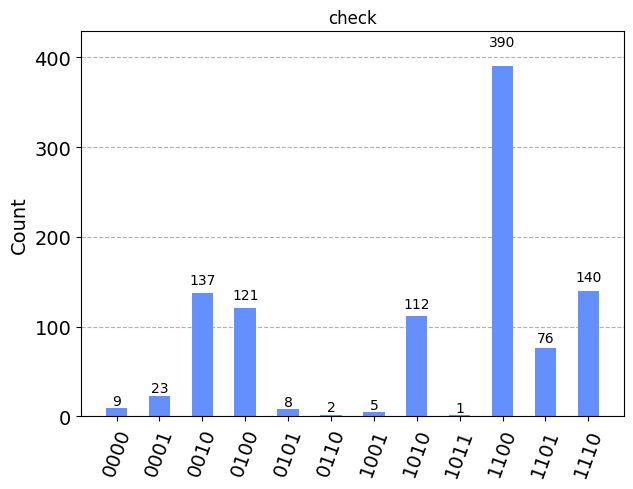

In [254]:
result = simulator.run(qc).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='check')


In [255]:
max(counts, key=counts.get)


'1100'

In [256]:
def bitstring_converter(string):
    
    values = []
    value = 0
    j = 0
    for i, v in enumerate(string):
        
        if v == '1':
            value += 1/(2**(i+1-j))
        elif v == " ":
            values.append(value)
            value = 0
            j = i+1
            
        if i == len(string)-1:
            values.append(value)
    
    return values



In [257]:
answer = bitstring_converter(max(counts, key=counts.get))

print('predicted: {}'.format(answer))

predicted: [0.75]


In [258]:

print('actual: {}'.format(phases[e]))

actual: 0.0


In [259]:
np.arange(0,1, 1/(2**(n)))


array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])